### * In this house price prediction i will predict the price houses in future with the use ofsupervised machine leartning that is the use of XGboost to check the house price house hence this is all about regression problem



* i will use boston datasets

In [29]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [11]:
#LOAD the dataset
data=pd.read_csv('/content/data.csv')

#Check the first five rows  of the data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
#Number of rows  and columns that are in my dataset
data.shape

(4600, 18)

In [13]:
#Check the missing values in my dataaset
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [33]:
data = data.copy()
# Label encoding for 'object' columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])


In [34]:
#Check the infor of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   int64  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int64  
 15  city           4600 non-null   int64  
 16  statezip       4600 non-null   int64  
 17  country        4600 non-null   int64  
dtypes: float

In [35]:
#GEt the statiscal measures of the datase
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,36.135217,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2265.385870,25.674348,38.743696,0.0
std,19.708177,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1307.591795,11.982721,20.919517,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,19.000000,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1132.750000,17.000000,21.000000,0.0
50%,38.000000,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2263.500000,32.000000,41.000000,0.0
75%,53.000000,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3400.250000,35.000000,56.000000,0.0
max,69.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4524.000000,43.000000,76.000000,0.0


* Understand  the colrellation between the datasets
 * postive
 * Negative colerraltion

In [36]:
#Check the colaration between the data
correlation=data.corr()

<Axes: >

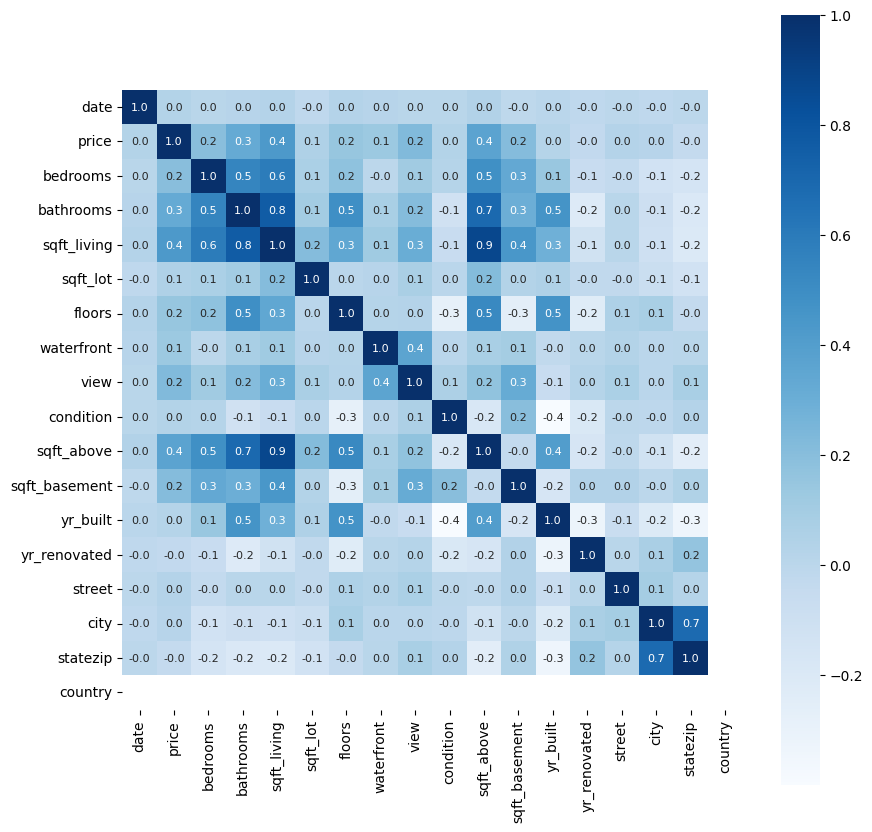

In [37]:
# Creating a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [38]:
#Split the data into labes and target
X=data.drop(columns='price',axis=0)
Y=data['price']

In [39]:
print(X)
print(Y)

      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0        0       3.0       1.50         1340      7912     1.5           0   
1        0       5.0       2.50         3650      9050     2.0           0   
2        0       3.0       2.00         1930     11947     1.0           0   
3        0       3.0       2.25         2000      8030     1.0           0   
4        0       4.0       2.50         1940     10500     1.0           0   
...    ...       ...        ...          ...       ...     ...         ...   
4595    68       3.0       1.75         1510      6360     1.0           0   
4596    68       3.0       2.50         1460      7573     2.0           0   
4597    68       3.0       2.50         3010      7014     2.0           0   
4598    69       4.0       2.00         2090      6630     1.0           0   
4599    69       3.0       2.50         1490      8102     2.0           0   

      view  condition  sqft_above  sqft_basement  yr_built  yr_

In [40]:
#Split the data into traing Data and test Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(4600, 17) (3680, 17) (920, 17)


In [42]:
X_train.dtypes

date               int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street             int64
city               int64
statezip           int64
country            int64
dtype: object

* Model Trianing and model Evaluation

In [44]:
#Load the model
model=XGBRegressor()

In [45]:
#Fit the model with X_train and Y_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## MODEL EVALUATION

In [47]:
#Checking using the number of current predicted value and that
train_data=model.predict(X_train)

In [48]:
print(train_data)

[510493.56 260965.78 539911.56 ... 415424.53 325151.8  618985.1 ]


In [51]:
#Use R Squared Error and mean abosule error mostly used
from sklearn import metrics
score_1=metrics.r2_score(Y_train,train_data)


#Mean
score_2=metrics.r2_score(Y_train,train_data)

In [53]:
print("R Square is:",score_1)
print("MAE",score_2)


R Square is: 0.9904498399395483
MAE 0.9904498399395483


In [55]:
#Prediction for test data
test_data=model.predict(X_test)

In [56]:
#Use R Squared Error and mean abosule error mostly used
from sklearn import metrics
score_1=metrics.r2_score(Y_test,test_data)


#Mean
score_2=metrics.r2_score(Y_test,test_data)

In [57]:
print("R Square is:",score_1)
print("MAE",score_2)


R Square is: 0.040437566862472574
MAE 0.040437566862472574


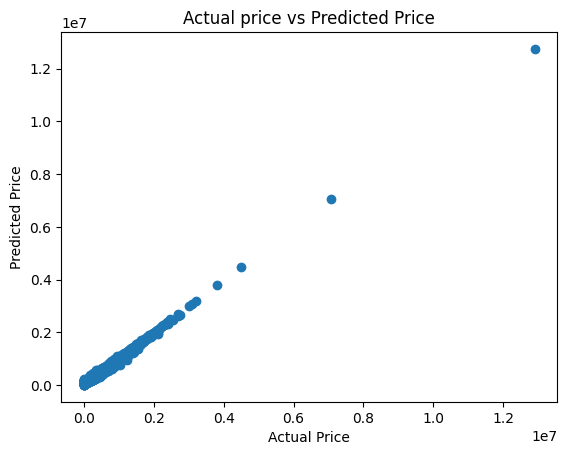

In [59]:
# Visualaizing the Actual priceses vs predicted data
plt.scatter(Y_train,train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

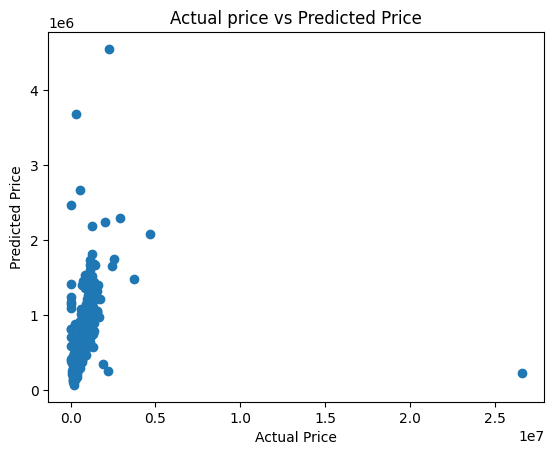

In [60]:
# Visualaizing the Actual priceses vs predicted data
plt.scatter(Y_test,test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()